PROBLEM STATEMENT: This project aim at using different machine learning algorithms to predict the sentiment of a text with the help of natural language processing tecniques.

#STEP 1: Import Libraries

In [1]:
#basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings('ignore')



In [2]:
#packages for data preparation (installed nlp_utils & contractions)

#nltk.download('all')
import nlp_utils, nltk, re, string
import contractions
import collections
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

#STEP 2
Import Dataset

In [3]:
# text analytics dataset
with open('TextAnalytics.txt','r') as data:
    dataset = data.read()
#dataset

In [4]:
with open('yelp_labelled.txt','r') as data:
    dataset1 = data.read()
#dataset1

#STEP 3: Data Preprocessing - Text Normalization

In [5]:
#striping \n and \t characters
dataset=dataset.split('\n')
corpus = [dataset]
for sent in dataset:
    corpus.append(sent.split('\t'))
#corpus

In [6]:
#striping \n and \t characters
dataset1 =dataset1.split('\n')
corpus1 = [dataset1]
for sent in dataset1:
    corpus1.append(sent.split('\t'))
corpus1

[['Wow... Loved this place.\t1',
  'Crust is not good.\t0',
  'Not tasty and the texture was just nasty.\t0',
  'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1',
  'The selection on the menu was great and so were the prices.\t1',
  'Now I am getting angry and I want my damn pho.\t0',
  "Honeslty it didn't taste THAT fresh.)\t0",
  'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0',
  'The fries were great too.\t1',
  'A great touch.\t1',
  'Service was very prompt.\t1',
  'Would not go back.\t0',
  'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0',
  'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1',
  'I was disgusted because I was pretty sure that was human hair.\t0',
  'I was shocked because no signs indicate cash only.\t0',
  'Highly recommended.\t1',
  'Waitress was a little slow in service.\t0',
  'This

In [7]:
# converting to lowercase.
letters_only1 = re.sub(r'[^a-zA-Z]', " ", str(corpus1))
letters_only1 =letters_only1.lower()
token1 =nltk.sent_tokenize(letters_only1)
#token1

In [8]:
letters_only = re.sub(r'[^a-zA-Z]', " ", str(corpus))
letters_only=letters_only.lower()
token=nltk.sent_tokenize(letters_only)
#token

Removing Contractions 

In [9]:
## contractions are expanded and the letters are converted to lowercase.
conm = contractions.CONTRACTION_MAP
def contraction_remove(corpus_nda):
    for key,value in conm.items():
        corpus_nda = re.sub(r"{}".format(key),'{}'.format(value),corpus_nda)
        
    return corpus_nda

special = string.punctuation
def w_tokenization(corpus_nda):
    # convert into lower case
    corpus_nda = corpus_nda.lower()
    # contraction
    corpus_nda = contraction_remove(corpus_nda)
    # 
    tokens = nltk.word_tokenize(corpus_nda) # word tokens

Removing Alphanumeric Characters

In [10]:
### Alpha numeric characters and decimals are replaced with characters
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

def clean_nda(token):
    tokens = nlp_utils.w_tokenization(token)
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

corpus_nda = list(map(clean_nda,token))
#corpus_nda

In [11]:
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

def clean_nda(token1):
    tokens = nlp_utils.w_tokenization(token1)
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

corpus_nda1 = list(map(clean_nda,token1))
#corpus_nda1

Putting Text Data in a Dataframe

In [12]:
df = pd.DataFrame(dataset)
df= df.rename(columns={0: 'Text'})
#df

In [13]:
df1 = pd.DataFrame(dataset1)
df1= df1.rename(columns={0: 'Text'})
df1

,Text
0,Wow... Loved this place.\t1
1,Crust is not good.\t0
2,Not tasty and the texture was just nasty.\t0
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
4205,"""You Belong With Me""4"";""YAY!!!! LAKERS WIN """
4206,"""you guys should check out fred on youtube hes..."
4207,"""you know twitter is going places when oprah s..."
4208,"""Youtube and Facebook ftw! """


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [15]:
df.head(50)

,Text
0,"0,""One of the other reviewers has mentioned th..."
1,"1,""A wonderful little production. <br /><br />..."
2,"2,""I thought this was a wonderful way to spend..."
3,"3,""Basically there's a family where a little b..."
4,"4,""Petter Mattei's """"Love in the Time of Money..."
5,"5,""Probably my all-time favorite movie, a stor..."
6,"6,""I sure would like to see a resurrection of ..."
7,"7,""This show was an amazing, fresh & innovativ..."
8,"8,""Encouraged by the positive comments about t..."
9,"9,""If you like original gut wrenching laughter..."


In [16]:
df.tail(50)

,Text
950,"950,""What a good movie! At last a picture reve..."
951,"951,""Had it with the one who raised you since ..."
952,"952,""Yes, it is a bit cheesy. But it's suspens..."
953,"953,""So it isn't an epic, but for people exper..."
954,"954,""I absolutely loved this film! I was hesit..."
955,"955,""Previous reviewer Claudio Carvalho gave a..."
956,"956,""Great premise, poor execution. Cast of gr..."
957,"957,""Have to agree that this movie and it's ta..."
958,"958,""I had two reasons for watching this swash..."
959,"959,""This film is an abomination of all that i..."


In [17]:
df = pd.concat([df, df1],ignore_index=True)
df

,Text
0,"0,""One of the other reviewers has mentioned th..."
1,"1,""A wonderful little production. <br /><br />..."
2,"2,""I thought this was a wonderful way to spend..."
3,"3,""Basically there's a family where a little b..."
4,"4,""Petter Mattei's """"Love in the Time of Money..."
...,...
5205,"""You Belong With Me""4"";""YAY!!!! LAKERS WIN """
5206,"""you guys should check out fred on youtube hes..."
5207,"""you know twitter is going places when oprah s..."
5208,"""Youtube and Facebook ftw! """


Removing Special Characters

In [18]:
#removing special characters
df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df.replace('br', '', regex=True, inplace=True)
df.replace('"', '', regex=True, inplace=True)
df.replace("'", '', regex=True, inplace=True)
df.replace('?', '', inplace=True)
df.replace("-", '', regex=True, inplace=True)
df.replace("*", '', inplace=True)
df.replace("***", '', inplace=True)
df.replace("< />", '', regex=True, inplace=True)
df['Text'] = df['Text'].str.strip('[')
df['Text'] = df['Text'].str.strip(']')
df['Text'] = df['Text'].str.strip(')')
df['Text'] = df['Text'].str.strip('(')
df['Text'] = df['Text'].str.strip('\t')
df

,Text
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...
3,Basically theres a family where a little boy (...
4,Petter Matteis Love in the Time of Money is a ...
...,...
5205,You Belong With Me;YAY!!!! LAKERS WIN
5206,you guys should check out fred on youtube hes ...
5207,you know twitter is going places when oprah st...
5208,Youtube and Facebook ftw!


Lemmatization, POS, Stopwords

In [19]:
df['Text'] = df['Text'].apply(nlp_utils.lemmatization_sentence)

In [20]:
Text=df['Text']
token = df['Text'].to_numpy()
token=nltk.sent_tokenize(str(token))
data = np.array(token)
#data

In [21]:
stop = stopwords.words('english')
text = data
text_tokens = word_tokenize(str(text))
tokens_without_sw = [word for word in text_tokens if not word in stop]
#print(tokens_without_sw) 


#STEP 4: Data Visualization

In [22]:
stopwords = set(stopwords.words("english"))

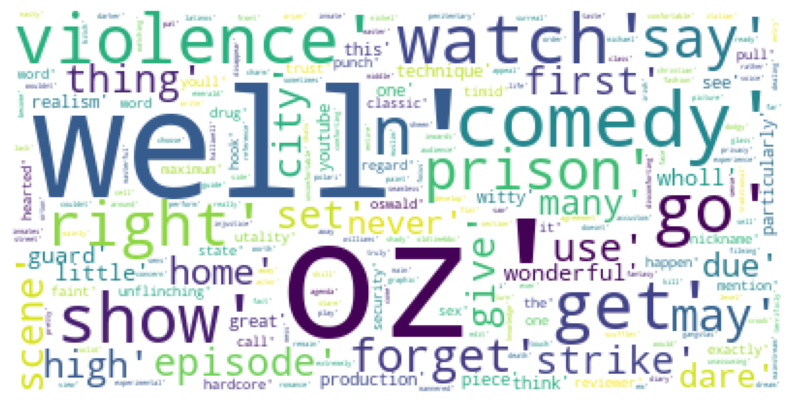

In [23]:
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1000).generate(str(tokens_without_sw))
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
# creating two lists to display the words and their counts
tokens_without_sw=(str(tokens_without_sw))
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

counted_words.most_common(100) # the word 'movie' has repeated for 2081 times.

[("'oz',", 6),
 ("'well',", 5),
 ("'comedy',", 5),
 ("'watch',", 4),
 ("'violence',", 4),
 ("'go',", 4),
 ("'show',", 4),
 ("'get',", 4),
 ('"\'",', 4),
 ("'right',", 3),
 ("'prison',", 3),
 ("'say',", 3),
 ("'forget',", 3),
 ("'may',", 3),
 ("'episode',", 2),
 ("'first',", 2),
 ("'thing',", 2),
 ("'strike',", 2),
 ("'scene',", 2),
 ("'set',", 2),
 ("'use',", 2),
 ("'give',", 2),
 ("'city',", 2),
 ("'high',", 2),
 ("'home',", 2),
 ("'many',", 2),
 ("'....',", 2),
 ("'never',", 2),
 ("'due',", 2),
 ("'dare',", 2),
 ("'...',", 2),
 ("'guard',", 2),
 ("'wholl',", 2),
 ("'wonderful',", 2),
 ("'little',", 2),
 ("'production',", 2),
 ("'technique',", 2),
 ("'realism',", 2),
 ("'piece',", 2),
 ("'see',", 2),
 ("'one',", 2),
 ("'great',", 2),
 ("'particularly',", 2),
 ("'think',", 2),
 ("'witty',", 2),
 ('"\'youtube",', 2),
 ("['[',", 1),
 ("'``',", 1),
 ("'[',", 1),
 ('"\'one",', 1),
 ("'reviewer',", 1),
 ("'mention',", 1),
 ("'youll',", 1),
 ("'hook',", 1),
 ("'exactly',", 1),
 ("'happen',",

<BarContainer object of 10 artists>

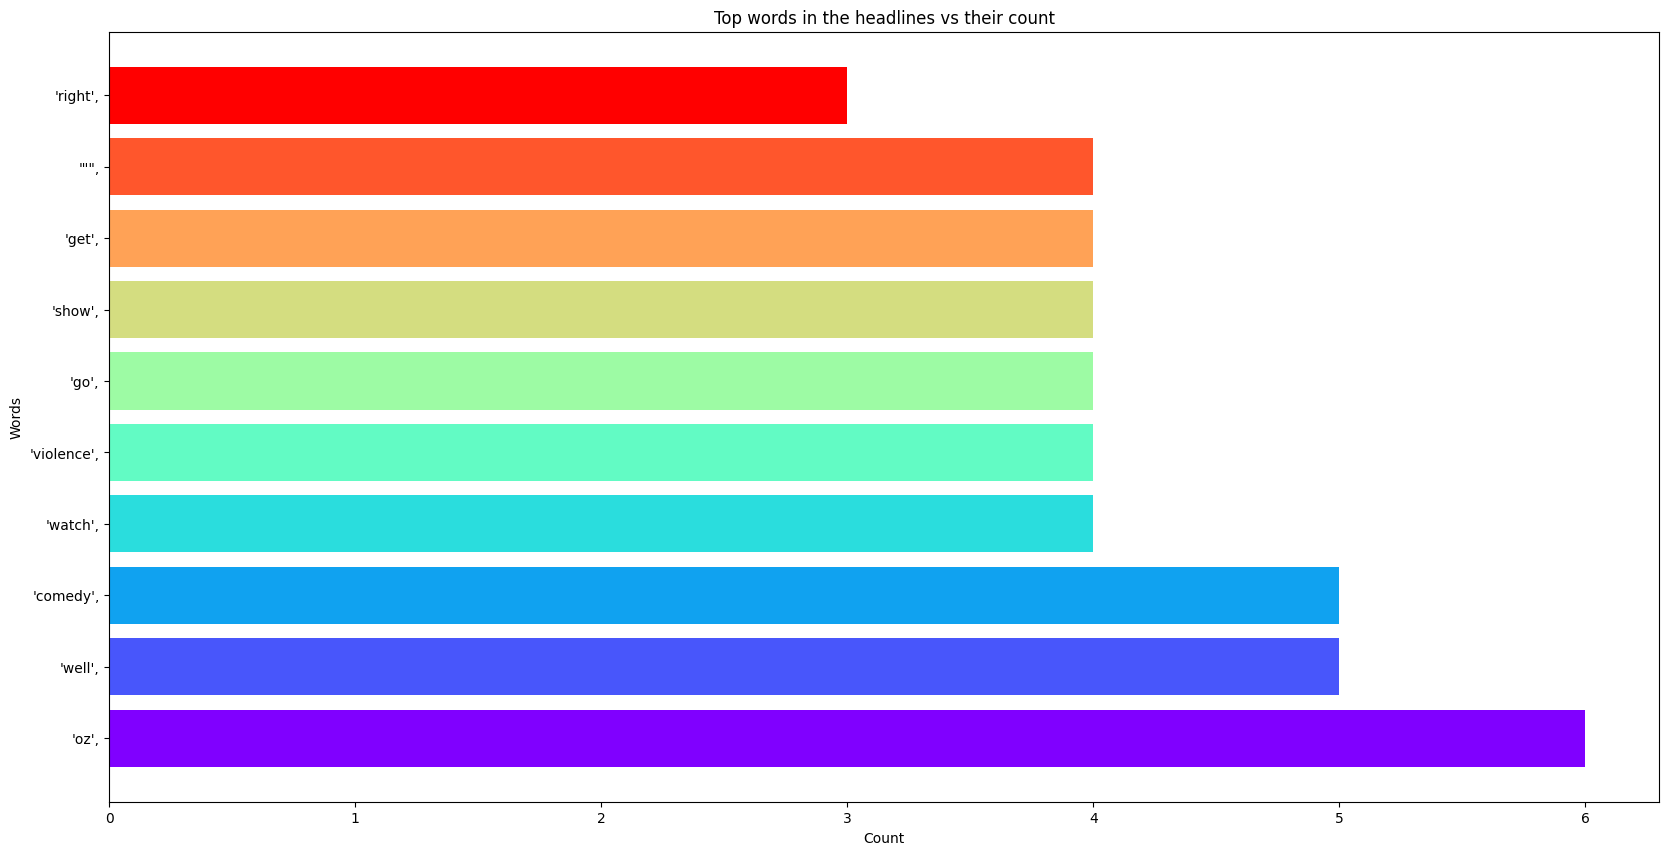

In [25]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

#STEP 5: Sentiment Analysis

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentence = tokens_without_sw
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:        
        neu_word_list.append(word)                

#print('Positive:',pos_word_list)        
#print('Neutral:',neu_word_list)    
#print('Negative:',neg_word_list) 
#score = sid.polarity_scores(sentence)
#print('\nScores:', score)

In [27]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

one of the other reviewer have mention that after watch just oz episode youll be hook they be right a this be exactly what happen with me.the first thing that strike me about oz be it utality and unflinching scene of violence which set in right from the word go trust me this be not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it be hardcore in the classic use of the word.it be call oz a that be the nickname give to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy be not high on the agenda em city be home to many .. aryan muslim gangstas latinos christian italian irish and more .... so scuffles death stare dodgy dealing and shady agreement be never far away.i would say the main appeal of the show be due to the fact that it go where other show wouldnt dare forget pretty picture paint for mainstream audience

In [28]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [29]:
df.head()

,Text,neg,neu,pos,compound
0,one of the other reviewer have mention that af...,0.171,0.760,0.069,-0.9898
1,a wonderful little production the filming tech...,0.049,0.767,0.184,0.9711
2,i think this be a wonderful way to spend time ...,0.102,0.673,0.225,0.9748
3,basically theres a family where a little boy j...,0.131,0.803,0.067,-0.9080
4,petter matteis love in the time of money be a ...,0.052,0.800,0.148,0.9744


In [30]:
#Assigning score categories and logic
sentences=df
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['compound'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['compound'] > 0) & (sentences.iloc[i]['compound'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['compound'] <= 0)):
        predicted_value.append('negative')
        i = i+1

predicted_value
## The threshold value will categorize if a given sentence is positive negative or neutral in nature. 

df['Target'] = predicted_value
df.head()

,Text,neg,neu,pos,compound,Target
0,one of the other reviewer have mention that af...,0.171,0.760,0.069,-0.9898,negative
1,a wonderful little production the filming tech...,0.049,0.767,0.184,0.9711,positive
2,i think this be a wonderful way to spend time ...,0.102,0.673,0.225,0.9748,positive
3,basically theres a family where a little boy j...,0.131,0.803,0.067,-0.9080,negative
4,petter matteis love in the time of money be a ...,0.052,0.800,0.148,0.9744,positive


In [31]:
df.drop(['neg','neu','pos','compound'],axis=1,inplace=True)
df
## Dropping the neg, neu, pos, and compound columns.

,Text,Target
0,one of the other reviewer have mention that af...,negative
1,a wonderful little production the filming tech...,positive
2,i think this be a wonderful way to spend time ...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money be a ...,positive
...,...,...
5205,you belong with me yay lakers win,positive
5206,you guy should check out fred on youtube he ou...,neutral
5207,you know twitter be go place when oprah start ...,negative
5208,youtube and facebook ftw,neutral


Text(0.5, 1.0, 'Negative Reviews')

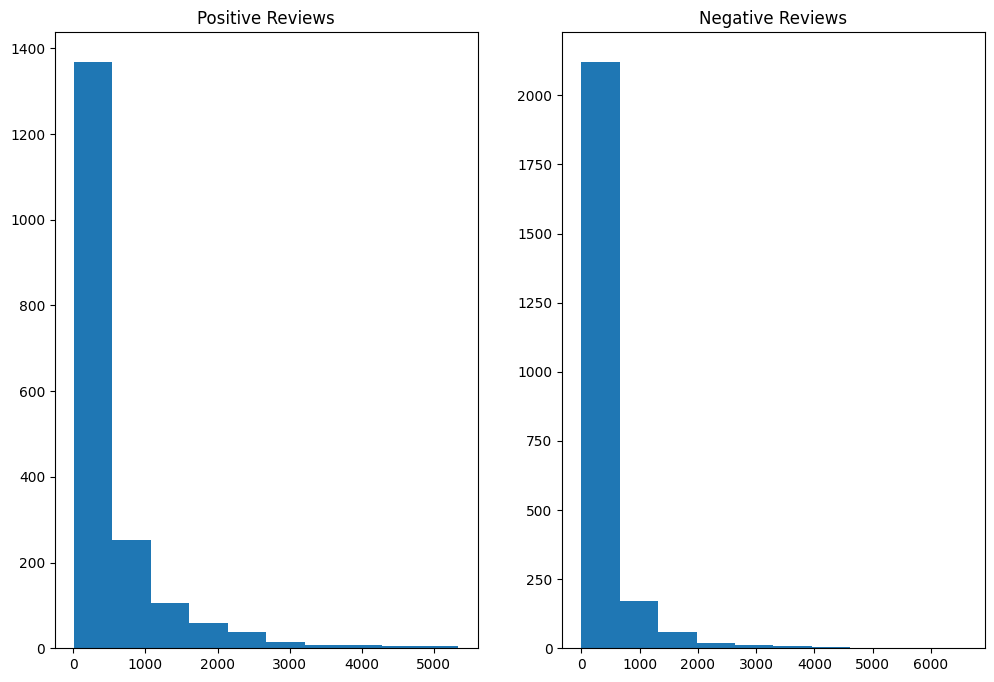

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['Target']=='positive']['Text'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['Target']=='negative']['Text'].str.len())
ax2.set_title( 'Negative Reviews')

Text(0.5, 1.0, 'Neutral Reviews')

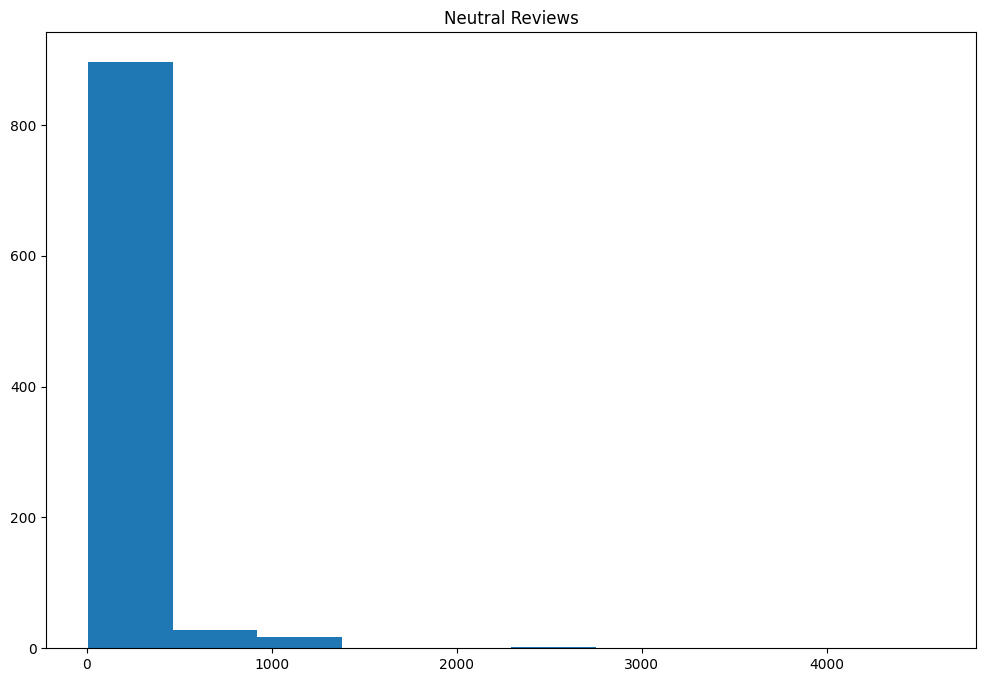

In [33]:
fig,(ax3)=plt.subplots(1, figsize=(12,8))
ax3.hist(df[df['Target']=='neutral']['Text'].str.len())
ax3.set_title( 'Neutral Reviews')

In [34]:
df.drop(df[df['Target'] == 'neutral'].index, inplace = True)
df

,Text,Target
0,one of the other reviewer have mention that af...,negative
1,a wonderful little production the filming tech...,positive
2,i think this be a wonderful way to spend time ...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money be a ...,positive
...,...,...
5201,yeah lakers i be so stinkin excite now the cav...,positive
5203,you belong with me by taylor swift how come i ...,positive
5205,you belong with me yay lakers win,positive
5207,you know twitter be go place when oprah start ...,negative


TRADITIONAL MACHINE LEARNING APPROACH

#STEP 4: Feature Extraction

In [35]:
## Applying Tf-Idf vectorizer on the Text column.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(df['Text'])
Y = df['Target']

#STEP 4
Prepare Dataset for Training

In [36]:
# Splitting the dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [37]:
X_train.shape

(3197, 16949)

In [38]:
Y_train.shape

(3197,)

LOGISTIC REGRESSION

#STEP 5: Model Training

In [39]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state =0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

#STEP 6: Model Testing

In [40]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['positive', 'positive', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [41]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

#STEP 7
Model Evaluation

<AxesSubplot: >

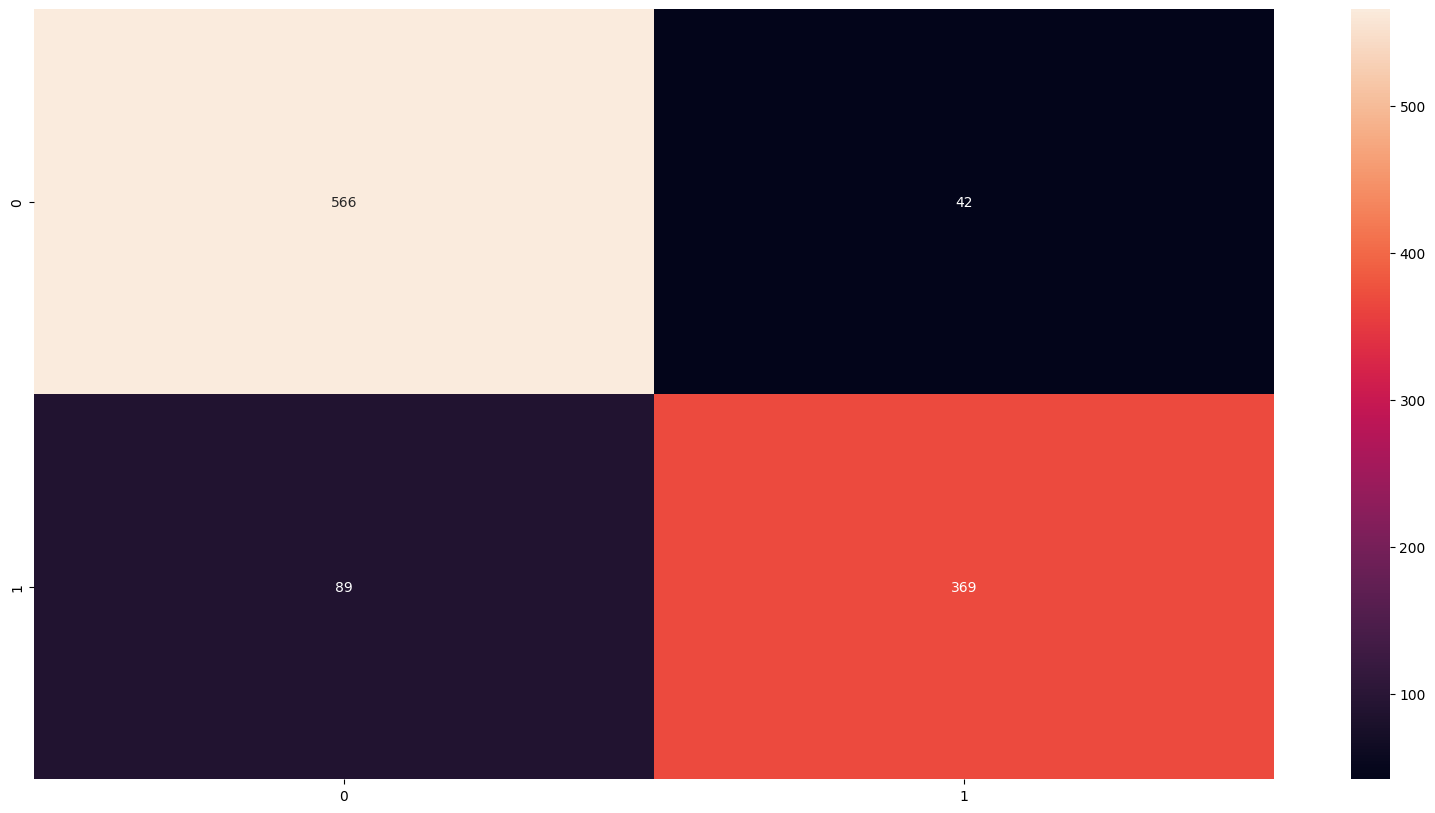

In [42]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm,annot=True, fmt='d')

In [43]:
# #accuracy on test
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.86      0.93      0.90       608
    positive       0.90      0.81      0.85       458

    accuracy                           0.88      1066
   macro avg       0.88      0.87      0.87      1066
weighted avg       0.88      0.88      0.88      1066



In [44]:
# #accuracy on train
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_predict_train))

              precision    recall  f1-score   support

    negative       0.94      0.96      0.95      1792
    positive       0.95      0.92      0.94      1405

    accuracy                           0.94      3197
   macro avg       0.95      0.94      0.94      3197
weighted avg       0.95      0.94      0.94      3197



NAIVE BAYES CLASSIFIER

#STEP 5: Model Training

In [45]:
#use GNB or MNB
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

#STEP 6: Model Testing

In [46]:
y_predict_test = MNB.predict(X_test)
y_predict_test

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [47]:
y_predict_train = MNB.predict(X_train)
y_predict_train

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

#STEP 7: Model Evaluation

<AxesSubplot: >

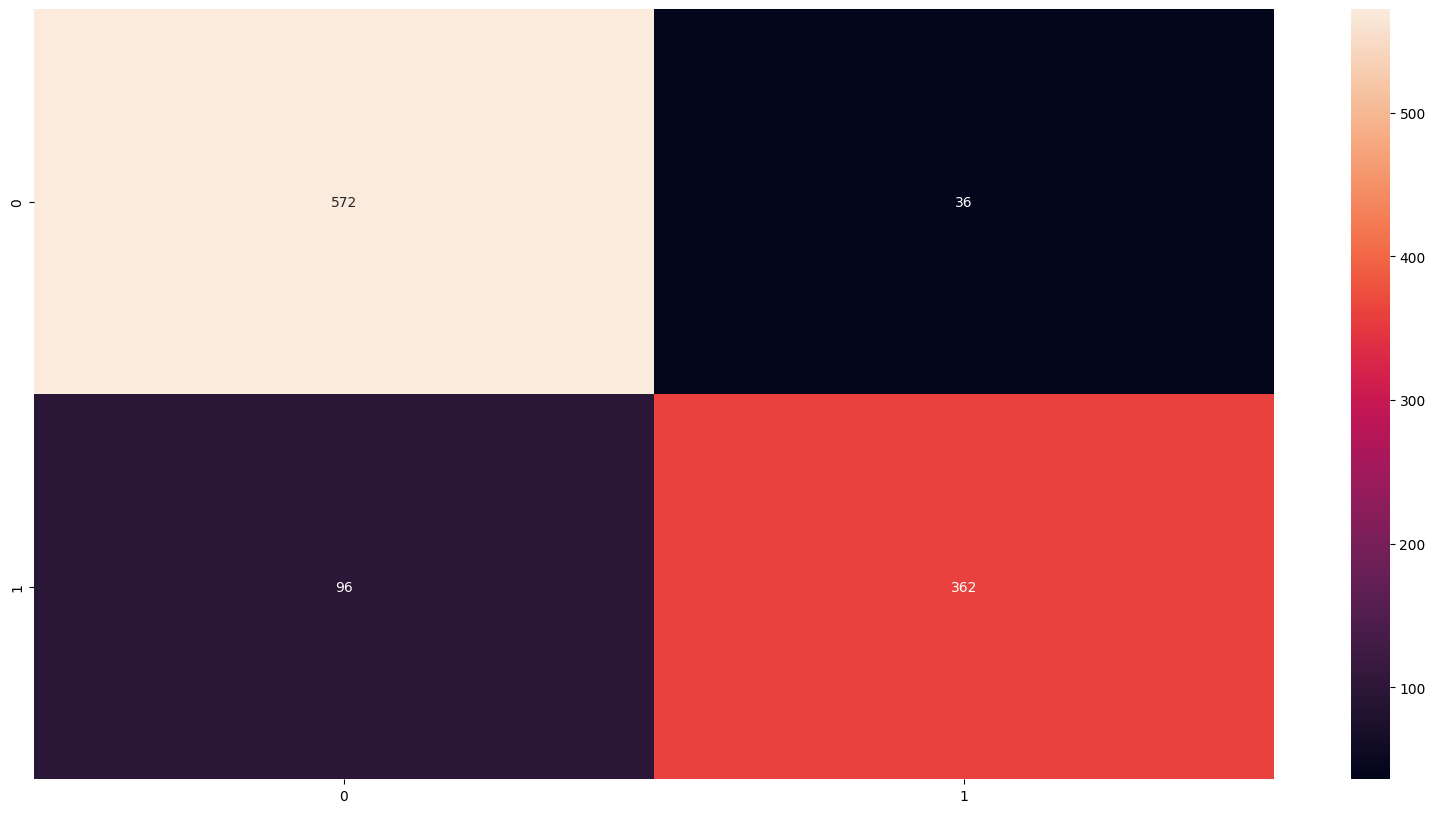

In [48]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm,annot=True, fmt='d')

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.86      0.94      0.90       608
    positive       0.91      0.79      0.85       458

    accuracy                           0.88      1066
   macro avg       0.88      0.87      0.87      1066
weighted avg       0.88      0.88      0.87      1066



In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_predict_train))

              precision    recall  f1-score   support

    negative       0.94      0.98      0.96      1792
    positive       0.98      0.93      0.95      1405

    accuracy                           0.96      3197
   macro avg       0.96      0.96      0.96      3197
weighted avg       0.96      0.96      0.96      3197



DEEP LEARNING

Recurrent Neural Networks - Long Short Term Memory Networks (LSTM)


In [52]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras


In [53]:
s = 0.0
for i in df['Text']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/df.shape[0])
pos = 0
for i in range(df.shape[0]):
    if df.iloc[i]['Target'] == 'positive':
        pos = pos + 1
neg = df.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/df.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/df.shape[0]*100)+"%")

Average length of each review :  59.72812573305184
Percentage of reviews with positive sentiment is 43.70161857846587%
Percentage of reviews with negative sentiment is 56.298381421534124%


In [54]:
from sklearn.preprocessing import LabelEncoder
reviews = df['Text'].values
labels = df['Target'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [55]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [56]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [57]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [58]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.25)

Epoch 1/5
75/75 [==============================] - 13s 128ms/step - loss: 0.6551 - accuracy: 0.6133 - val_loss: 0.5362 - val_accuracy: 0.7325
Epoch 2/5
75/75 [==============================] - 9s 114ms/step - loss: 0.3160 - accuracy: 0.8707 - val_loss: 0.3517 - val_accuracy: 0.8637
Epoch 3/5
75/75 [==============================] - 9s 116ms/step - loss: 0.1258 - accuracy: 0.9558 - val_loss: 0.3777 - val_accuracy: 0.8675
Epoch 4/5
75/75 [==============================] - 9s 115ms/step - loss: 0.0670 - accuracy: 0.9804 - val_loss: 0.4363 - val_accuracy: 0.8775
Epoch 5/5
75/75 [==============================] - 9s 116ms/step - loss: 0.0298 - accuracy: 0.9942 - val_loss: 0.5410 - val_accuracy: 0.8687


In [59]:
from sklearn.metrics import classification_report
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(classification_report(test_labels,pred_labels))

34/34 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       600
           1       0.82      0.83      0.83       466

    accuracy                           0.85      1066
   macro avg       0.84      0.85      0.84      1066
weighted avg       0.85      0.85      0.85      1066

